# LSTM Stock Prediction Project (Apple, Microsoft and NVIDIA)

## 1. Import Required Libraries

In [1]:
# Import the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

# This makes our plots look nicer
plt.style.use('ggplot')

## 2. Download Stock Data

In [2]:
# Choose our stocks and time period
tech_stocks = ['AAPL', 'MSFT', 'NVDA']  # Apple, Microsoft, NVIDIA
start_date = '2019-01-01'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Create empty dictionary to store our data
stock_dfs = {}

# Download data for each stock and store as pandas DataFrame
for stock in tech_stocks:
    print(f"Downloading data for {stock}...")
    # yfinance already returns a pandas DataFrame
    stock_dfs[stock] = yf.download(stock, start=start_date, end=end_date)
    print(f"Downloaded {len(stock_dfs[stock])} days of data")
    print(f"DataFrame columns: {stock_dfs[stock].columns.tolist()}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Downloaded 1582 days of data
DataFrame columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


[*********************100%***********************]  1 of 1 completed


Downloaded 1582 days of data
DataFrame columns: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT')]


[*********************100%***********************]  1 of 1 completed

Downloaded 1582 days of data
DataFrame columns: [('Close', 'NVDA'), ('High', 'NVDA'), ('Low', 'NVDA'), ('Open', 'NVDA'), ('Volume', 'NVDA')]


## 3. Data Checking & Cleaning

In [3]:
# Let's check for missing values in each stock dataset
for stock in tech_stocks:
    missing = stock_dfs[stock].isnull().sum()
    if missing.sum() > 0:
        print(f"{stock} has missing values:")
        print(missing[missing > 0])  # Only show columns with missing values
        print("Filling missing values...")
        stock_dfs[stock].fillna(method='ffill', inplace=True)  # Forward fill (use previous day's value)
    else:
        print(f"{stock} DataFrame has no missing values - great!")

AAPL DataFrame has no missing values - great!
MSFT DataFrame has no missing values - great!
NVDA DataFrame has no missing values - great!


## 4. Data Exploration & Visualization

<Figure size 1200x600 with 0 Axes>

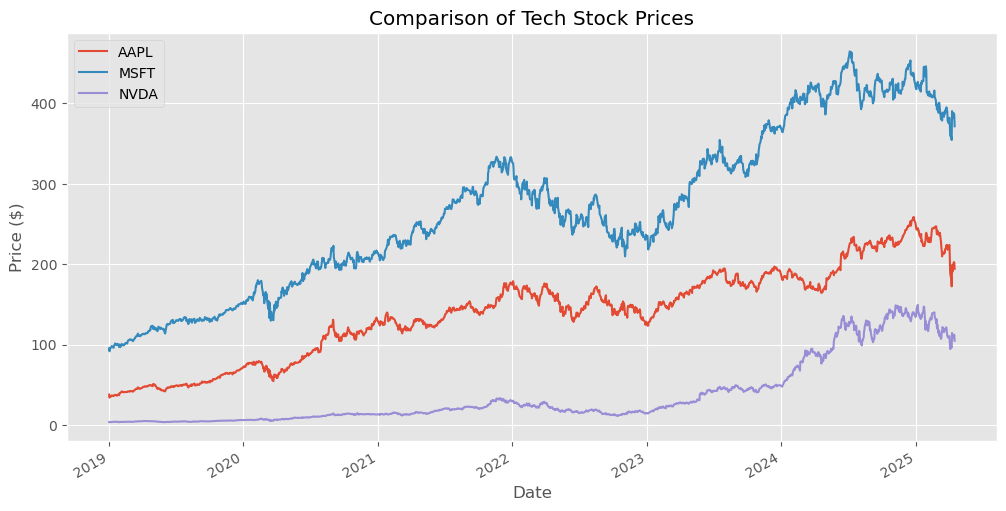

<Figure size 1200x600 with 0 Axes>

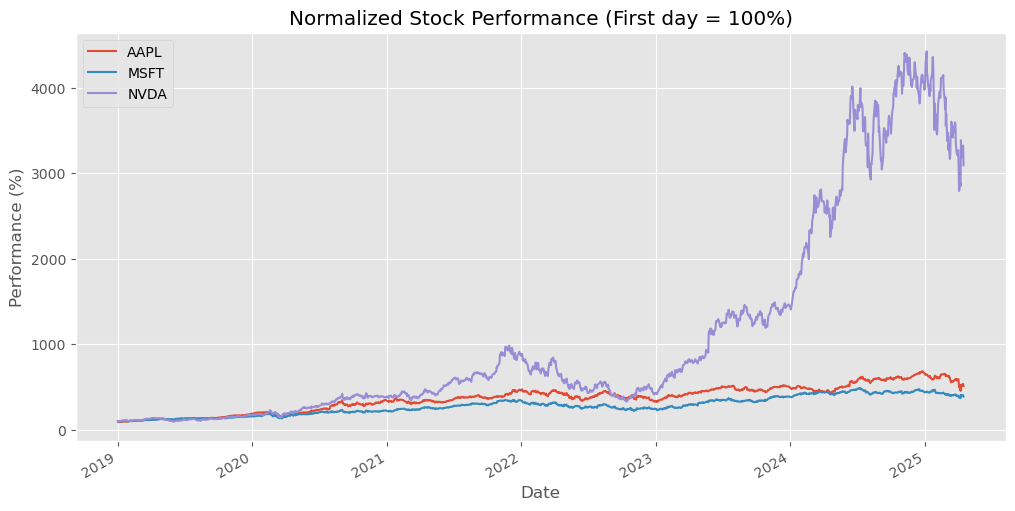

<Figure size 1200x600 with 0 Axes>

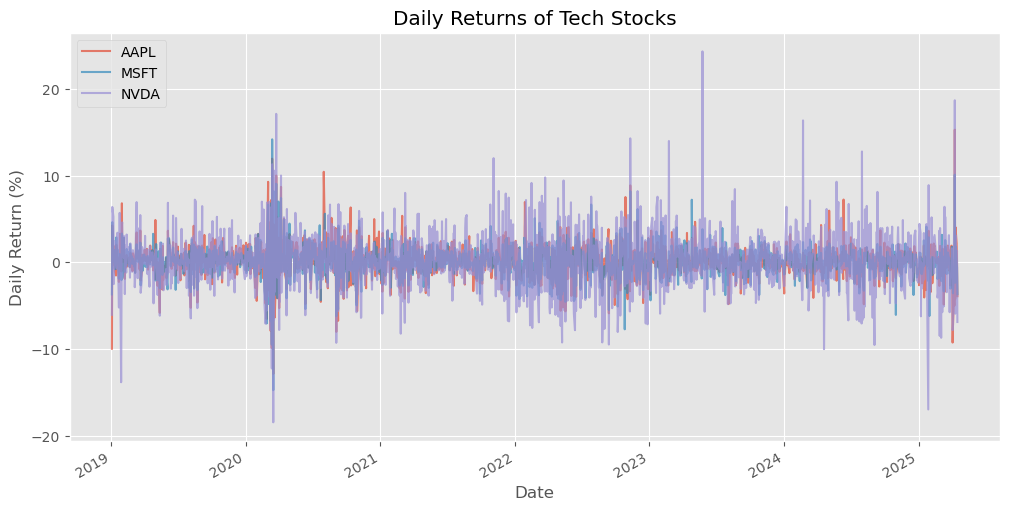


Correlation between stocks:
          AAPL      MSFT      NVDA
AAPL  1.000000  0.959643  0.814798
MSFT  0.959643  1.000000  0.868071
NVDA  0.814798  0.868071  1.000000


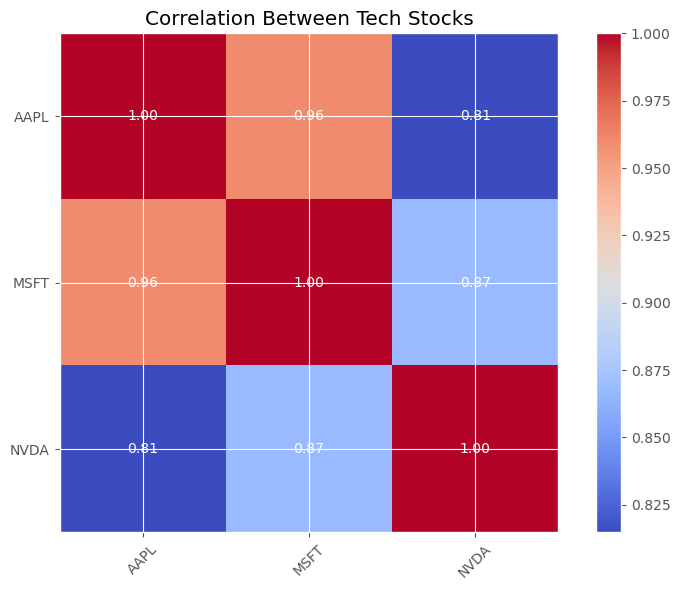


Statistics for AAPL:
Summary statistics:
Ticker         AAPL
count   1582.000000
mean     139.280862
std       56.334026
min       33.915249
25%       94.789705
50%      145.535080
75%      176.255203
max      258.735504
Current Price: $194.27
Total Return: 415.75%
Average Daily Return: 0.124%
Volatility (Daily): 2.007%

Statistics for MSFT:
Summary statistics:
Ticker         MSFT
count   1582.000000
mean     267.438996
std       99.279493
min       91.620529
25%      196.352913
50%      258.827896
75%      332.535011
max      464.854340
Current Price: $371.61
Total Return: 290.68%
Average Daily Return: 0.103%
Volatility (Daily): 1.838%

Statistics for NVDA:
Summary statistics:
Ticker         NVDA
count   1582.000000
mean      36.870200
std       40.994296
min        3.173704
25%       10.475638
50%       18.643958
75%       45.418455
max      149.416245
Current Price: $104.49
Total Return: 2993.45%
Average Daily Return: 0.273%
Volatility (Daily): 3.352%


In [4]:
# First, let's create a new DataFrame with just the closing prices of all stocks
# This makes comparison easier
closing_prices_df = pd.DataFrame()
for stock in tech_stocks:
    closing_prices_df[stock] = stock_dfs[stock]['Close']

# Now let's visualize the closing prices
plt.figure(figsize=(12, 6))
closing_prices_df.plot(figsize=(12, 6))
plt.title('Comparison of Tech Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Create a DataFrame with normalized prices (all starting at 100)
normalized_df = pd.DataFrame()
for stock in tech_stocks:
    normalized_df[stock] = stock_dfs[stock]['Close'] / stock_dfs[stock]['Close'].iloc[0] * 100

# Plot normalized prices
plt.figure(figsize=(12, 6))
normalized_df.plot(figsize=(12, 6))
plt.title('Normalized Stock Performance (First day = 100%)')
plt.xlabel('Date')
plt.ylabel('Performance (%)')
plt.legend()
plt.show()

# Create a DataFrame with daily returns
returns_df = pd.DataFrame()
for stock in tech_stocks:
    returns_df[stock] = stock_dfs[stock]['Close'].pct_change() * 100

# Remove the first row (which will have NaN values)
returns_df = returns_df.dropna()

# Plot daily returns
plt.figure(figsize=(12, 6))
returns_df.plot(figsize=(12, 6), alpha=0.7)
plt.title('Daily Returns of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

# Calculate correlation between stocks and display as a heatmap
correlation_df = closing_prices_df.corr()
print("\nCorrelation between stocks:")
print(correlation_df)

plt.figure(figsize=(8, 6))
plt.imshow(correlation_df, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_df)), correlation_df.columns, rotation=45)
plt.yticks(range(len(correlation_df)), correlation_df.columns)
plt.title('Correlation Between Tech Stocks')

# Add correlation values on the heatmap
for i in range(len(correlation_df)):
    for j in range(len(correlation_df)):
        plt.text(j, i, f'{correlation_df.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='white')
plt.tight_layout()
plt.show()

# Print some basic statistics about the stocks using DataFrame methods
for stock in tech_stocks:
    print(f"\nStatistics for {stock}:")
    
    # Use pandas describe() method
    stats = stock_dfs[stock]['Close'].describe()
    print(f"Summary statistics:\n{stats}")
    
    # Calculate additional metrics
    current_price = stock_dfs[stock]['Close'].iloc[-1]
    print(f"Current Price: ${float(current_price.iloc[0]):.2f}")
    
    # Calculate total return
    total_return = ((stock_dfs[stock]['Close'].iloc[-1] / stock_dfs[stock]['Close'].iloc[0]) - 1) * 100
    print(f"Total Return: {float(total_return.iloc[0]):.2f}%")
    
    # Calculate average daily return
    avg_daily_return_val = stock_dfs[stock]['Close'].pct_change().mean() * 100
    print(f"Average Daily Return: {float(avg_daily_return_val.iloc[0]):.3f}%")
    
    # Calculate volatility (standard deviation of returns)
    volatility_val = stock_dfs[stock]['Close'].pct_change().std() * 100
    print(f"Volatility (Daily): {float(volatility_val.iloc[0]):.3f}%")
    

## 5. Feature Engineering

In [5]:
# Simple feature engineering
# Create a new DataFrame with the closing prices and the next day's price
feature_df = pd.DataFrame()
for stock in tech_stocks:
    feature_df[stock] = stock_dfs[stock]['Close'].shift(-1)  # Shift the closing prices up by one day
    feature_df[stock + '_prev'] = stock_dfs[stock]['Close']  # Previous day's closing price
    feature_df[stock + '_return'] = stock_dfs[stock]['Close'].pct_change()  # Daily return
    feature_df[stock + '_volatility'] = stock_dfs[stock]['Close'].rolling(window=5).std()  # 5-day rolling volatility
    feature_df[stock + '_SMA'] = stock_dfs[stock]['Close'].rolling(window=5).mean()  # 5-day simple moving average
    feature_df[stock + '_EMA'] = stock_dfs[stock]['Close'].ewm(span=5, adjust=False).mean()  # 5-day exponential moving average
    feature_df[stock + '_RSI'] = 100 - (100 / (1 + (stock_dfs[stock]['Close'].pct_change().rolling(window=14).mean() /
                                                      stock_dfs[stock]['Close'].pct_change().rolling(window=14).std())))  # 14-day RSI
    feature_df[stock + '_MACD'] = stock_dfs[stock]['Close'].ewm(span=12, adjust=False).mean() - \
        stock_dfs[stock]['Close'].ewm(span=26, adjust=False).mean()  # MACD
    feature_df[stock + '_MACD_signal'] = feature_df[stock + '_MACD'].ewm(span=9, adjust=False).mean()  # MACD signal line
    feature_df[stock + '_MACD_hist'] = feature_df[stock + '_MACD'] - feature_df[stock + '_MACD_signal']  # MACD histogram
    feature_df[stock + '_Bollinger_upper'] = feature_df[stock + '_SMA'] + (feature_df[stock + '_volatility'] * 2)  # Upper Bollinger Band
    feature_df[stock + '_Bollinger_lower'] = feature_df[stock + '_SMA'] - (feature_df[stock + '_volatility'] * 2)  # Lower Bollinger Band
    feature_df[stock + '_Bollinger_width'] = feature_df[stock + '_Bollinger_upper'] - feature_df[stock + '_Bollinger_lower']  # Bollinger Band width

# Remove the last row (which will have NaN values)
feature_df = feature_df.dropna()
# Print the first few rows of the feature DataFrame
print("\nFeature DataFrame:")
print(feature_df.head())


Feature DataFrame:
                 AAPL  AAPL_prev  AAPL_return  AAPL_volatility   AAPL_SMA  \
Date                                                                        
2019-01-23  36.422100  36.713093     0.004044         0.339567  36.963069   
2019-01-24  37.629021  36.422100    -0.007926         0.417353  36.856211   
2019-01-25  37.280785  37.629021     0.033137         0.536362  36.946850   
2019-01-28  36.894379  37.280785    -0.009254         0.512211  36.922044   
2019-01-29  39.415546  36.894379    -0.010365         0.474661  36.987875   

             AAPL_EMA   AAPL_RSI  AAPL_MACD  AAPL_MACD_signal  AAPL_MACD_hist  \
Date                                                                            
2019-01-23  36.784084  -4.187287  -0.148290         -0.249371        0.101081   
2019-01-24  36.663422  23.802057  -0.159428         -0.231382        0.071954   
2019-01-25  36.985288  22.998678  -0.070059         -0.199117        0.129059   
2019-01-28  37.083787  20.619129  -

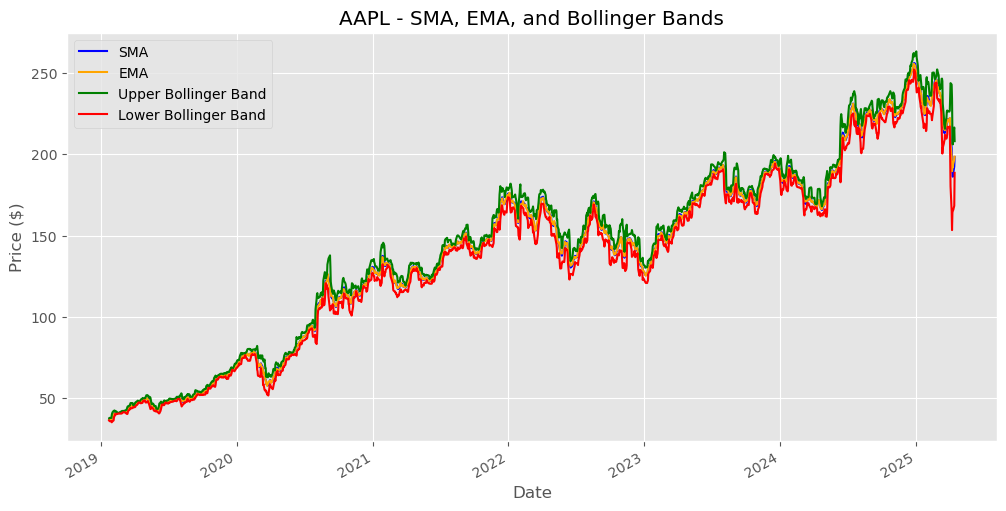

In [6]:
# Visualize the features
plt.figure(figsize=(12, 6))
feature_df[tech_stocks[0] + '_SMA'].plot(label='SMA', color='blue')
feature_df[tech_stocks[0] + '_EMA'].plot(label='EMA', color='orange')
feature_df[tech_stocks[0] + '_Bollinger_upper'].plot(label='Upper Bollinger Band', color='green')
feature_df[tech_stocks[0] + '_Bollinger_lower'].plot(label='Lower Bollinger Band', color='red')
plt.title(f"{tech_stocks[0]} - SMA, EMA, and Bollinger Bands")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


## 6. Model Creation


Training LSTM model for AAPL...


2025-04-17 15:21:58.245513: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-17 15:21:58.245680: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-17 15:21:58.245684: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-17 15:21:58.246081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-17 15:21:58.246093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/youra/opt/anaconda3/envs/conda-env-3119/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. Whe

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0072
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
📉 AAPL RMSE: 9.91


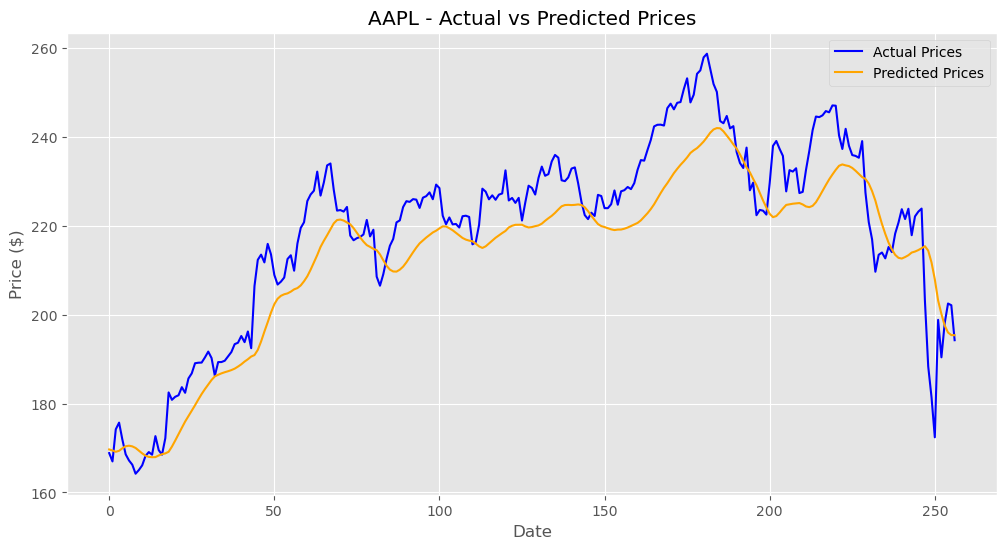

✅ Model saved as models/AAPL_lstm_model.h5

Training LSTM model for MSFT...


/Users/youra/opt/anaconda3/envs/conda-env-3119/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0067
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
📉 MSFT RMSE: 15.12


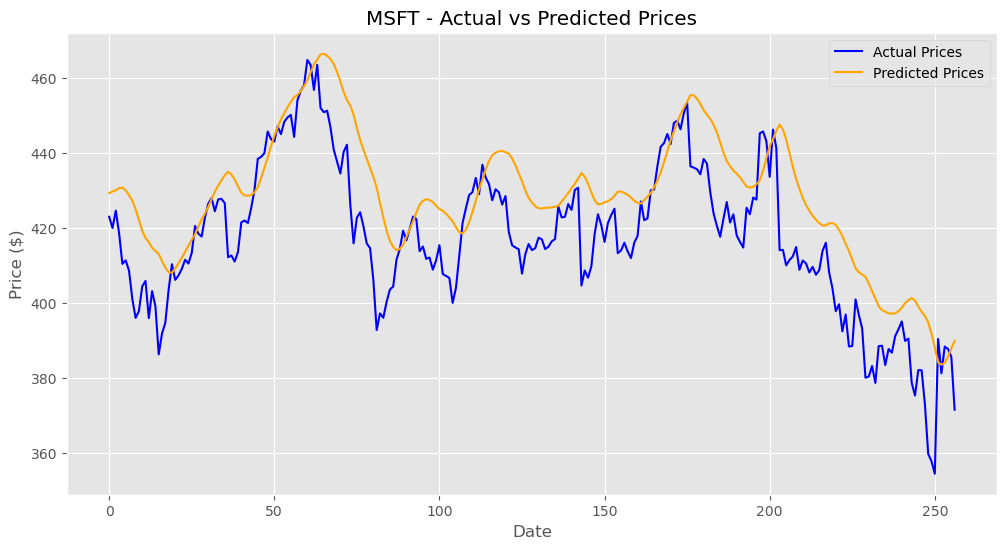

✅ Model saved as models/MSFT_lstm_model.h5

Training LSTM model for NVDA...


/Users/youra/opt/anaconda3/envs/conda-env-3119/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 6.1427e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
📉 NVDA RMSE: 7.14


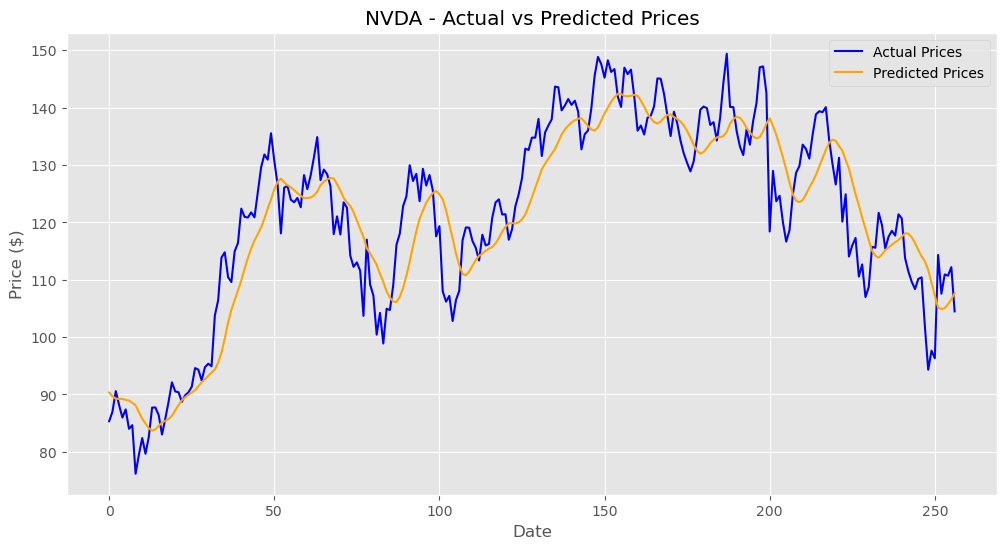

✅ Model saved as models/NVDA_lstm_model.h5


In [7]:
import os

def train_and_predict_lstm(stock_symbol, stock_df, sequence_length=60, epochs=1, batch_size=1):
    print(f"\nTraining LSTM model for {stock_symbol}...")
    
    # Prepare closing prices
    closing_prices = stock_df['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices)

    # Train-test split
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    # Create training sequences
    X_train, y_train = [], []
    for i in range(sequence_length, len(train_data)):
        X_train.append(train_data[i-sequence_length:i, 0])
        y_train.append(train_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Create the model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    # Compile and train
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

    # Create test sequences
    X_test = []
    for i in range(sequence_length, len(test_data)):
        X_test.append(test_data[i-sequence_length:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict
    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Actual prices
    actual_prices = closing_prices[train_size + sequence_length:]

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
    print(f"📉 {stock_symbol} RMSE: {rmse:.2f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices', color='blue')
    plt.plot(predicted_prices, label='Predicted Prices', color='orange')
    plt.title(f"{stock_symbol} - Actual vs Predicted Prices")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

    # Create models directory if it doesn't exist
    os.makedirs('models', exist_ok=True)
    
    # Save model in the models directory
    model_path = f"models/{stock_symbol}_lstm_model.h5"
    model.save(model_path)
    print(f"✅ Model saved as {model_path}")

# Run the model for each stock
for symbol in tech_stocks:
    train_and_predict_lstm(symbol, stock_dfs[symbol])

This is a simple LSTM model for stock price prediction.
It uses the closing prices of the stocks to predict the next day's price.
The model is trained on 80% of the data and tested on the remaining 20%.
The RMSE is calculated to evaluate the model's performance.
The model is saved as an H5 file for future use.
Note: This is a basic implementation and can be improved by tuning hyperparameters, adding more features, and using more advanced techniques.
The model can also be used for other stocks by changing the stock symbol.